## Oil Price data

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

# Bokeh provides state and county boundaries as latitude, longitudes. 
# This will be useful for assigning oil/gas wells to a given county.
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.us_states import data as states

Historical oil price data was readily available from the Energy Information Administration website. This data is reported by day. Note that oil price changes are tracked by trading firms down to nano-seconds. That data is not publicly available (I tried) and quite costly to purchase, and is anyway not useful to us, as we are interested in only slow, macroscopic changes in local economies.

I just downloaded the data as a Excel file from the EIA's website, which is stored in the OilPrices folder.

In [2]:
# The data is stored in the sheet 'Data 1', and the first two rows are just headers
oil_prices = pd.read_excel('./OilPrices/HistoricalOilPrice.xls',sheetname='Data 1',skiprows=[0,1])

In [3]:
# Exploring the data
oil_prices.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel)
0,1986-01-02,25.56,NaN
1,1986-01-03,26.00,NaN
2,1986-01-06,26.53,NaN
3,1986-01-07,25.85,NaN
4,1986-01-08,25.87,NaN


In [4]:
# rename the columns so they are shorter
oil_prices.columns = ['Date','WTI','Brent']

In [5]:
# The WTI prices can be interpolated to get data for missing days. 
# Interpolation is quite sufficient here as we will average the data over a month
oil_prices.WTI = oil_prices.WTI.interpolate()

In [6]:
# Drop the Brent prices as we are only interested in the WTI benchmark
oil_prices = oil_prices[['Date','WTI']]
oil_prices.set_index('Date',inplace=True)

# check how the data frame looks
oil_prices.head()

,WTI
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


Now average out the oil price data by month.

In [7]:
oil_price_month = oil_prices.groupby(pd.Grouper(freq='M')).mean()
oil_price_month.reset_index(inplace=True)
oil_price_month['Date'] = oil_price_month['Date'].dt.strftime('%m/%Y')
oil_price_month.head()

,Date,WTI
0,01/1986,22.925455
1,02/1986,15.454737
2,03/1986,12.612500
3,04/1986,12.843636
4,05/1986,15.377619


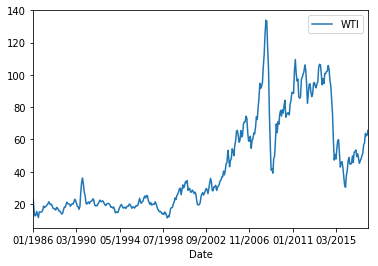

In [8]:
# See how the data looks
oil_price_month.plot('Date','WTI')
plt.show()

In [9]:
# save the data to file
oil_price_month.to_csv('./OilPrices/oil_price_by_month.csv',index=False)